## 3. CopyErrorImages
Abstract:
- Copy error images 2 times
- copy hard classifier images

## Run name

In [1]:
import time

project_name = 'ic_furniture2018'
step_name = 'CopyErrorImages'
time_str = time.strftime("%Y%m%d_%H%M%S", time.localtime())
run_name = project_name + '_' + step_name + '_' + time_str
print('run_name: ' + run_name)
t0 = time.time()

run_name: ic_furniture2018_CopyErrorImages_20180520_184333


## Improtant Params

In [2]:
image_size = 299
width = height = image_size
target_size = (width, height)
batch_size = 32
epochs = 25
print(image_size)

run_name_acc = 'ic_furniture2018_TrainPredict_FineTune1_20180520_041526_8418'
# run_name_acc = 'ic_furniture2018_TrainPredict_FineTune1_20180519_035431_8231'
print(run_name_acc)

299
ic_furniture2018_TrainPredict_FineTune1_20180520_041526_8418


## Import PKGs

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from IPython.display import display

import os
import gc
import math
import shutil
import zipfile
import pickle
import h5py
from PIL import Image

from tqdm import tqdm
import multiprocessing

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

cpu_amount = multiprocessing.cpu_count()
print('cpu_amount: ', cpu_amount)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


cpu_amount:  8


## Project folders

In [4]:
cwd = os.getcwd()
input_folder = os.path.join(cwd, 'input')
output_folder = os.path.join(cwd, 'output')
model_folder = os.path.join(cwd, 'model')
feature_folder = os.path.join(cwd, 'feature')
post_pca_feature_folder = os.path.join(cwd, 'post_pca_feature')
log_folder = os.path.join(cwd, 'log')
print('input_folder: \t\t\t%s' % input_folder)
print('output_folder: \t\t\t%s' % output_folder)
print('model_folder: \t\t\t%s' % model_folder)
print('feature_folder: \t\t%s' % feature_folder)
print('post_pca_feature_folder: \t%s' % post_pca_feature_folder)
print('log_folder: \t\t\t%s' % log_folder)

org_train_folder = os.path.join(input_folder, 'org_train')
org_val_folder = os.path.join(input_folder, 'org_val')
org_test_folder = os.path.join(input_folder, 'org_test')
train_folder = os.path.join(input_folder, 'data_train')
val_folder = os.path.join(input_folder, 'data_val')
test_folder = os.path.join(input_folder, 'data_test')
test_sub_folder = os.path.join(test_folder, 'test')

if not os.path.exists(post_pca_feature_folder):
    os.mkdir(post_pca_feature_folder)
    print('Create folder: %s' % post_pca_feature_folder)

train_json_file = os.path.join(input_folder, 'train.json')
val_json_file = os.path.join(input_folder, 'validation.json')
test_json_file = os.path.join(input_folder, 'test.json')
print('\ntrain_json_file: \t\t%s' % train_json_file)
print('val_json_file: \t\t\t%s' % val_json_file)
print('test_json_file: \t\t%s' % test_json_file)

train_csv_file = os.path.join(input_folder, 'train.csv')
val_csv_file = os.path.join(input_folder, 'validation.csv')
test_csv_file = os.path.join(input_folder, 'test.csv')
print('\ntrain_csv_file: \t\t%s' % train_csv_file)
print('val_csv_file: \t\t\t%s' % val_csv_file)
print('test_csv_file: \t\t\t%s' % test_csv_file)

sample_submission_csv_file = os.path.join(input_folder, 'sample_submission_randomlabel.csv')
print('\nsample_submission_csv_file: \t%s' % sample_submission_csv_file)

input_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input
output_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/output
model_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/model
feature_folder: 		/data1/kaggle/imaterialist-challenge-furniture-2018/feature
post_pca_feature_folder: 	/data1/kaggle/imaterialist-challenge-furniture-2018/post_pca_feature
log_folder: 			/data1/kaggle/imaterialist-challenge-furniture-2018/log

train_json_file: 		/data1/kaggle/imaterialist-challenge-furniture-2018/input/train.json
val_json_file: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input/validation.json
test_json_file: 		/data1/kaggle/imaterialist-challenge-furniture-2018/input/test.json

train_csv_file: 		/data1/kaggle/imaterialist-challenge-furniture-2018/input/train.csv
val_csv_file: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input/validation.csv
test_csv_file: 			/data1/kaggle/imaterialist-challenge-furniture-2018/input/test.csv


## Preview data

In [5]:
train_csv = pd.read_csv(train_csv_file)
print('train_csv.shape is {0}.'.format(train_csv.shape))
display(train_csv.head(2))

val_csv = pd.read_csv(val_csv_file)
print('val_csv.shape is {0}.'.format(val_csv.shape))
display(val_csv.head(2))

test_csv = pd.read_csv(test_csv_file)
print('test_csv.shape is {0}.'.format(test_csv.shape))
display(test_csv.head(2))

test_csv = pd.read_csv(test_csv_file)
print('test_csv.shape is {0}.'.format(test_csv.shape))
display(test_csv.head(2))

sample_submission_csv = pd.read_csv(sample_submission_csv_file)
print('sample_submission_csv.shape is {0}.'.format(sample_submission_csv.shape))
display(sample_submission_csv.head(2))

train_csv.shape is (194828, 3).


,image_id,label_id,url
0,1,5,https://img13.360buyimg.com/imgzone/jfs/t2857/...
1,2,5,http://www.tengdakeli.cn/350/timg01/uploaded/i...


val_csv.shape is (6400, 3).


,image_id,label_id,url
0,1,38,http://www.ghs.net/public/images/fb/3d/51/3beb...
1,2,63,https://img.alicdn.com/imgextra/TB2chFei9YH8KJ...


test_csv.shape is (12800, 2).


,image_id,url
0,1,https://img13.360buyimg.com/imgzone/jfs/t13174...
1,2,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg


test_csv.shape is (12800, 2).


,image_id,url
0,1,https://img13.360buyimg.com/imgzone/jfs/t13174...
1,2,http://img35.ddimg.cn/79/22/1258168705-1_u.jpg


sample_submission_csv.shape is (12800, 2).


,id,predicted
0,1,57
1,2,74


In [6]:
train_id = train_csv['image_id']
train_label_id = train_csv['label_id']

id_2_train_label_id_dict = dict(zip(train_id, train_label_id))
print('len(id_2_train_label_id_dict)=%d' % len(id_2_train_label_id_dict))

index = 0
print('id: %s, \tlandmark_id:%s' % (train_id[index], id_2_train_label_id_dict[train_id[index]]))
index = 1
print('id: %s, \tlandmark_id:%s' % (train_id[index], id_2_train_label_id_dict[train_id[index]]))

image_file = '%s_%s.jpg' % (train_id[index], id_2_train_label_id_dict[train_id[index]])
print(image_file)

len(id_2_train_label_id_dict)=194828
id: 1, 	landmark_id:5
id: 2, 	landmark_id:5
2_5.jpg


In [7]:
val_id = val_csv['image_id']
val_label_id = val_csv['label_id']

id_2_val_label_id_dict = dict(zip(val_id, val_label_id))
print('len(id_2_val_label_id_dict)=%d' % len(id_2_val_label_id_dict))

index = 0
print('id: %s, \tlandmark_id:%s' % (val_id[index], id_2_val_label_id_dict[val_id[index]]))
index = 1
print('id: %s, \tlandmark_id:%s' % (val_id[index], id_2_val_label_id_dict[val_id[index]]))

image_file = '%s_%s.jpg' % (val_id[index], id_2_val_label_id_dict[val_id[index]])
print(image_file)

len(id_2_val_label_id_dict)=6400
id: 1, 	landmark_id:38
id: 2, 	landmark_id:63
2_63.jpg


In [8]:
test_id = test_csv['image_id']

index = 0
print('id: %s' % (test_id[index]))
index = 1
print('id: %s' % (test_id[index]))

image_file = '%s.jpg' % (test_id[index])
print(image_file)

id: 1
id: 2
2.jpg


## Load proba

In [9]:
def save_proba(y_train_proba, y_train, y_val_proba, y_val, y_test_proba, test_filenames, file_name):
    test_filenames = [n.encode('utf8') for n in test_filenames]
    print(test_filenames[:10])
    if os.path.exists(file_name):
        os.remove(file_name)
        print('File removed: \t%s' % file_name)
    with h5py.File(file_name) as h:
        h.create_dataset('y_train_proba', data=y_train_proba)
        h.create_dataset('y_train', data=y_train)
        h.create_dataset('y_val_proba', data=y_val_proba)
        h.create_dataset('y_val', data=y_val)
        h.create_dataset('y_test_proba', data=y_test_proba)
        h.create_dataset('test_filenames', data=test_filenames)
    print('File saved: \t%s' % file_name)

def load_proba(file_name):
    with h5py.File(file_name, 'r') as h:
        y_train_proba = np.array(h['y_train_proba'])
        y_train = np.array(h['y_train'])
        y_val_proba = np.array(h['y_val_proba'])
        y_val = np.array(h['y_val'])
        y_test_proba = np.array(h['y_test_proba'])
        test_filenames = np.array(h['test_filenames'])
    print('File loaded: \t%s' % file_name)
    test_filenames = [n.decode('utf8') for n in test_filenames]
    print(test_filenames[:10])
    
    return y_train_proba, y_train, y_val_proba, y_val, y_test_proba, test_filenames


y_proba_file = os.path.join(model_folder, 'proba_%s.p' % run_name_acc)
# save_proba(y_train_proba, train_generator.classes, y_val_proba, val_generator.classes, y_test_proba, test_generator.filenames, y_proba_file)
y_train_proba, y_train, y_val_proba, y_val, y_test_proba, test_filenames = load_proba(y_proba_file)

print(y_train_proba.shape)
print(y_train.shape)
print(y_val_proba.shape)
print(y_val.shape)
print(y_test_proba.shape)
print(len(test_filenames))

File loaded: 	/data1/kaggle/imaterialist-challenge-furniture-2018/model/proba_ic_furniture2018_TrainPredict_FineTune1_20180520_041526_8418.p
['test/1.jpg', 'test/10.jpg', 'test/100.jpg', 'test/1000.jpg', 'test/10000.jpg', 'test/10001.jpg', 'test/10002.jpg', 'test/10003.jpg', 'test/10004.jpg', 'test/10005.jpg']
(243027, 128)
(243027,)
(6301, 128)
(6301,)
(12652, 128)
12652


In [10]:
print(y_train_proba[:1])
print(y_train[:1])

[[9.99998927e-01 1.47293787e-12 2.03859574e-09 1.07481233e-08
  9.12684928e-19 3.41628265e-07 2.73184361e-12 6.75534227e-13
  3.86010981e-07 5.71060690e-12 5.04763849e-18 3.35384579e-13
  4.88535878e-09 1.04953578e-12 2.02742784e-13 5.48340468e-18
  1.69513854e-07 2.42808440e-08 3.75463050e-10 1.16750555e-12
  5.63566381e-12 6.52199148e-08 4.74372520e-11 5.36691490e-18
  3.34086269e-15 2.90137879e-12 7.06361702e-18 5.42171866e-16
  5.97036187e-14 4.63740171e-14 4.25959552e-18 1.26557608e-12
  8.40805932e-16 1.33695409e-20 2.26541508e-10 3.17230020e-13
  9.60187984e-13 6.54886356e-13 5.36668258e-13 3.21494879e-11
  1.14755838e-16 1.04513695e-08 1.47670043e-10 1.35336076e-10
  4.07566550e-11 3.57118068e-12 3.34740428e-13 3.75004125e-11
  1.08103328e-16 3.76290943e-11 1.38759133e-14 3.77457066e-10
  2.32061068e-22 4.48330484e-09 7.11776298e-12 6.53297877e-14
  2.91059088e-08 1.89926335e-13 1.83814262e-08 6.64523688e-12
  2.08031901e-20 1.74965865e-22 8.88858362e-11 1.10227608e-14
  1.1040

In [11]:
y_train_pred = np.argmax(y_train_proba, axis=1)
print(y_train_pred[:30])
print(y_train[:30])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [12]:
from keras.preprocessing.image import ImageDataGenerator

# In strict, we do not need the params of ImageDataGenerator, because we only need filenames
train_gen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=50.,
    zoom_range=[0.85, 0.95],
    channel_shift_range=100.,
    fill_mode='wrap',
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.7, 1.]
)

data_train_path = os.path.join(input_folder, 'data_train')
train_generator = train_gen.flow_from_directory(data_train_path, target_size, shuffle=False, batch_size=batch_size)
print(train_generator.classes[:10])
print(train_generator.filenames[:10])

Using TensorFlow backend.


Found 243027 images belonging to 128 classes.
[0 0 0 0 0 0 0 0 0 0]
['001/89809_1.jpg', '001/89810_1.jpg', '001/89811_1.jpg', '001/89812_1.jpg', '001/89813_1.jpg', '001/89814_1.jpg', '001/89815_1.jpg', '001/89816_1.jpg', '001/89817_1.jpg', '001/89818_1.jpg']


In [13]:
error_dict = {}
for i, info in enumerate(zip(y_train, y_train_pred, train_generator.filenames)):
#     print(info)
    if info[0] != info[1]:
        error_dict[info[2]] = ('error', info[0], info[1])

In [14]:
print(len(error_dict.keys()))
print(list(error_dict.items())[:3])

3814
[('001/89876_1.jpg', ('error', 0, 16)), ('001/89926_1.jpg', ('error', 0, 16)), ('001/89935_1.jpg', ('error', 0, 5))]


0 --> 16


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


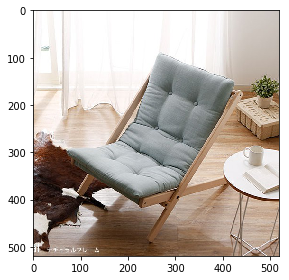

In [15]:
from skimage import io

indx = 0
key = list(error_dict.keys())[indx]
image_file = os.path.join(data_train_path, key)
print('%s --> %s' % (error_dict[key][1], error_dict[key][2]))
img = io.imread(image_file)
io.imshow(img)

In [16]:
def del_copied_images(folder):
    sub_folder_names = os.listdir(folder)
    for folder_name in sub_folder_names:
        sub_solder = os.path.join(folder, folder_name)
        if not os.path.isdir(sub_solder):
            continue
        image_names = os.listdir(sub_solder)
        print('|', end='')
        for image_name in image_names:
            if image_name.startswith('error'):
#                 print(image_name)
                copy_error_image_file = os.path.join(sub_solder, image_name)
#                 print(copy_error_image_file)
                os.remove(copy_error_image_file)
                print('-', end='')
        print('|')


In [17]:
# del_copied_images(data_train_path)

In [18]:
def copy_images(folder, error_dict):
    sub_folder_names = os.listdir(folder)
    for folder_name in sub_folder_names:
        sub_solder = os.path.join(folder, folder_name)
        if not os.path.isdir(sub_solder):
            continue
        image_names = os.listdir(sub_solder)
        print('|', end='')
        for image_name in image_names:
            image_file = os.path.join(sub_solder, image_name)
#             print(image_name)
            concatinate_key = '%s/%s' % (folder_name, image_name)
#             print(concatinate_key)
            if concatinate_key in error_dict:
                org_error_image_file = os.path.join(sub_solder, image_name)
            
                copy_error_image_file = os.path.join(sub_solder, 'error_' + image_name)
                if not os.path.exists(copy_error_image_file):
                    os.symlink(org_error_image_file, copy_error_image_file)
                    print('+', end='')
                else:
                    print('-', end='')
                    
                copy_error_image_file = os.path.join(sub_solder, 'error1_' + image_name)
                if not os.path.exists(copy_error_image_file):
                    os.symlink(org_error_image_file, copy_error_image_file)
                    print('+', end='')
                else:
                    print('-', end='')
        print('|')

In [19]:
copy_images(data_train_path, error_dict)

|++--++++++++++++++++++++++++|
|----++++++++----++++++--++--++++++++++++--++++++--++--------++--|
|++++--++++++++++++|
|++++--++++++++++++++++--++--++++++--++++++|
|++++--++++++|
|----++++++++++++++++++|
|++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++|
|++++++--++++++++++++++++++++++++++++++++--++++++++|
|++++++++++++++++++++--++--++++++++++++|
|++++++--++++++++++--++++++++--++++++--++++++++--++--------++++++--|
|++++++|
|--++++++--++++++++++++++++++++++++++++++++++++++++--++++++++--++++++++++--++++++++++----++|
|++++++++++++++++++++++++++--++----++++++++++++++++++++++++++++++++++++++|
|++++++++++++++++++++++++++++++++++++++++++++++++++++++|
|++++++++++++++++++++--++++--++++++++++++++++++++++++++++++++--++++++--++++++++++--++++++++++++--++++--|
|++++++++++|
|++++++++|
|++++++--++++|
|++|
|++++++++++++++++++++++|
|++++++++++++++++++++++++++++++--++--++++++--+++++

In [20]:
print(run_name)

t1 = time.time()
print('time cost: %.2f s' % (t1-t0))
print('Done!')

ic_furniture2018_CopyErrorImages_20180520_184333
time cost: 20.29 s
Done!
